<IPython.core.display.Javascript object>


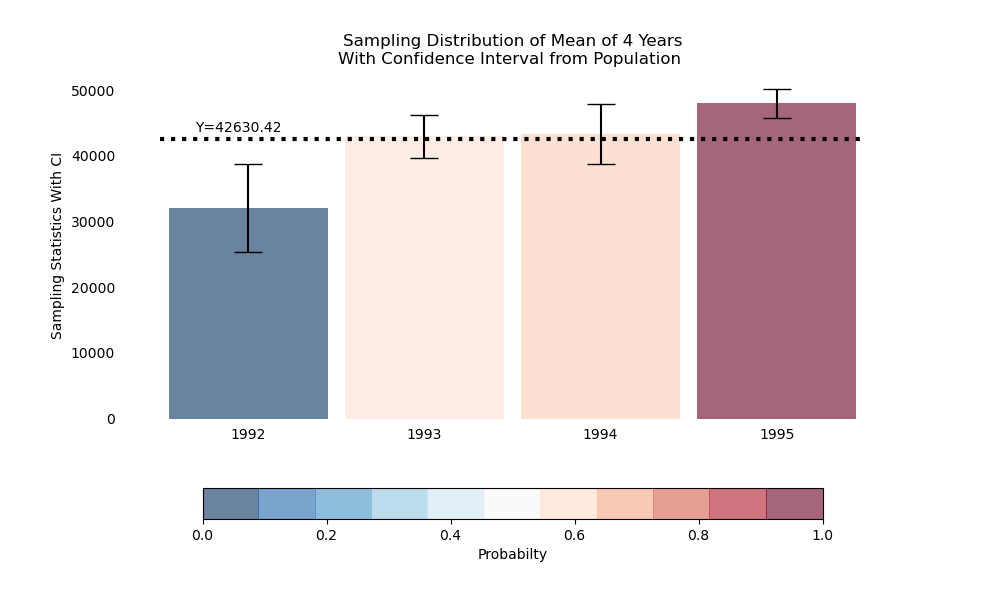

7

In [1]:
%matplotlib notebook

### now with the interactivity
import numpy as np
import pandas as pd
from matplotlib import cm
import scipy.stats as stats
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt

## 1000 sample.mean of orginal data 
np.random.seed(12345)
df_means = pd.DataFrame({1992 : [np.random.normal(32000, 200000, 3650).mean() for i in range(1000)], 
                         1993: [np.random.normal(43000, 100000, 3650).mean() for i in range(1000)],
                         1994: [np.random.normal(43500, 140000, 3650).mean() for i in range(1000)],
                         1995: [np.random.normal(48000, 70000, 3650).mean() for i in range(1000) ]})



df1 = df_means.T
df1['mean'] = df_means.mean(axis=0)
df1["yerr"] = df_means.std(axis=0) * 1.96
df1['ci_high'] = df1['mean'] + df1['yerr']
df1['ci_low'] = df1['mean'] - df1['yerr']


## lets make an intial random Y value
y = 40000

# cumulative Probality 0 , 1 according to the y value
# if prob .5 y == mean
# and so on
prob = stats.norm.cdf((y - df1['mean'])/(df1["yerr"]/1.96) )

fig = plt.figure(figsize=(10,6))

# color bar map task
my_cmap =plt.cm.get_cmap("RdBu_r", lut=11)
colors = my_cmap(prob)
sm = ScalarMappable(cmap=my_cmap)

# color bar intially
clr=plt.colorbar(sm, alpha=.6, orientation="horizontal", shrink=.8, fraction=.10)

#plto the bar intialy, before the interaction
plt.bar(x=range(len(df_means.columns)), height=df_means.mean(),
        color=colors , width=.90, linewidth=0, yerr=df_means.std() *1.96,
        tick_label=[1992, 1993, 1994, 1995], capsize=10,
       alpha=.6)


# plot the intial line with the a baised value 
plt.hlines(y, -.5, 3.5, linestyles="dotted", linewidth=2)
plt.text(x= -.3, y=y+1000, s= "Y={}".format(round(y, 2)))

# dejunkfy the plot
plt.tick_params(left=False, bottom=False)

clr.set_label("Probabilty")

## remore the spine
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
## set the y label and title, for intial plot
plt.ylabel("Sampling Statistics With CI")
plt.title("""Sampling Distribution of Mean of 4 Years\nWith Confidence Interval from Population """)
    


## Now define FUnction for Interactivity

def onrelease(event):
    plt.cla()
    # count the cumulative probabilty each time event is happened
    prob = stats.norm.cdf((event.ydata - df1['mean'])/(df1["yerr"]/1.96) )
    
    # set the Bar Color according to Probabiliy 
    bar_clr = cm.RdBu(prob)
    
    #plot the bar 
    plt.bar(x=range(len(df_means.columns)), height=df_means.mean(),
        color=bar_clr , width=.90, linewidth=0, yerr=df_means.std() *1.96,
        tick_label=[1992, 1993, 1994, 1995], capsize=10,
       alpha=.6)
    
    plt.hlines(event.ydata, -.5, 3.5, linestyles="dotted", linewidth=3)
    plt.text(x= -.3, y=event.ydata+1000, s= "Y={}".format(round(event.ydata, 2)))
    
    ## set the y label and title
    plt.ylabel("Sampling Statistics With CI")
    plt.title("""Sampling Distribution of Mean of 4 Years\nWith Confidence Interval from Population """)
    

fig.canvas.mpl_connect('button_release_event', onrelease)